<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Laboratorio_8_EoML_Nathalia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8

En este laboratorio aplicaremos regresión polinomial de grado n para estudiar el sobreajuste a datos generados con ruido aleatorio

In [0]:
import numpy as np
import pandas as pd
import operator
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score


print("Todos los paquetes han sido importados:")

Todos los paquetes han sido importados:


Generemos datos a partir de una función senoidal

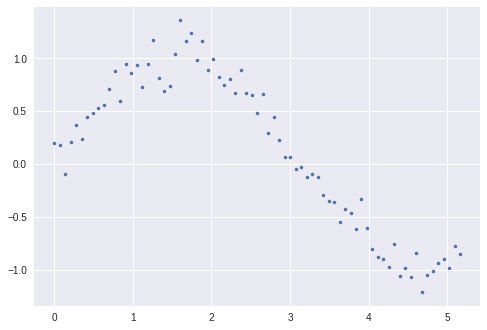

In [0]:
import random
from matplotlib.pylab import rcParams

#Tomemos ángulos de 0 a 300
x = np.array([i*np.pi/180 for i in range(0,300,4)])
np.random.seed(10)  #El error aleatorio será reproducible
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

## Ejercicios

## 1.   Sobre los datos generados, realiza regresiones polinomiales de grado 1 a 16. Guarda los coeficientes, RMS de entrenamiento y R^2 para cada regresión





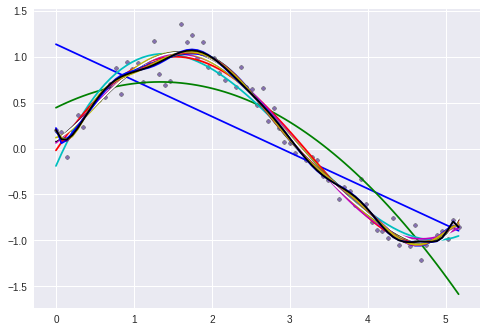

In [0]:
# transformando la data porque es necesario para sacar el r2 score
x1 = x[:, np.newaxis]
y1 = y[:, np.newaxis]

RMSE_list = []
R2_list = []
Coefs = []
color_graph = ['b','g','c','r','m','y','k','w','b','g','c','r','m','y','b','k']
for i in range(1,17):
  polynomial_features= PolynomialFeatures(degree=i)
  x_poly = polynomial_features.fit_transform(x1)

  model = LinearRegression()
  model.fit(x_poly, y1)
  y_poly_pred = model.predict(x_poly)

  rmse = np.sqrt(mean_squared_error(y1,y_poly_pred))
  r2 = r2_score(y1,y_poly_pred)
  RMSE_list.append(rmse)
  R2_list.append(r2)
  Coefs.append(model.coef_)
  
  plt.scatter(x1, y1, s=10)
  plt.plot(x1, y_poly_pred, color=color_graph[i-1])

plt.show()

In [0]:
poly_reg = PolynomialFeatures(degree = 16)
x2 = poly_reg.fit_transform(pd.DataFrame(x))
poly_model = sm.OLS(y,x2)
poly_result = poly_model.fit()
print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.83e-42
Time:                        00:35:16   Log-Likelihood:                 54.308
No. Observations:                  75   AIC:                            -78.62
Df Residuals:                      60   BIC:                            -43.85
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1891      0.122      1.546      0.1

## 2.   Genera un nuevo set de datos usando a partir de la misma función seno y utiliza este conjunto como el set de prueba. Guarda el RMS de prueba para cada uno.


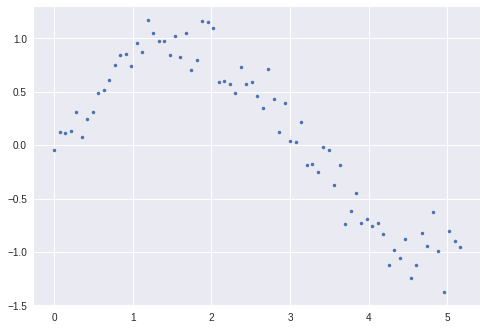

In [0]:
xs = np.array([i*np.pi/180 for i in range(0,300,4)])
np.random.seed(15)
ys = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([xs,ys]),columns=['xs','ys'])
plt.plot(data['xs'],data['ys'],'.')

In [0]:
x1s = xs[:, np.newaxis]
y1s = ys[:, np.newaxis]

MSE_list = []

for i in range(1,17):
  polynomial_features= PolynomialFeatures(degree=i)
  x_poly = polynomial_features.fit_transform(x1s)

  model = LinearRegression()
  model.fit(x_poly, y1s)
  y_poly_pred = model.predict(x_poly)

  MSE = mean_squared_error(y1s,y_poly_pred)
  MSE_list.append(MSE)

print(MSE_list)

[0.19845536301176753, 0.08827522398941992, 0.026508887799664472, 0.02413196966558591, 0.02403637787136264, 0.023643649770405995, 0.022302645065384045, 0.02222303059732437, 0.022215175632808937, 0.022160889457221316, 0.02148905898459359, 0.021488677684388526, 0.02126769574702861, 0.02126731939891388, 0.02083742331753365, 0.020655700501583215]


## 3.   Compara los RMS de prueba de todas las regresiones. ¿Hay algún grado polinomial que minimiza el RMS de prueba para este modelo? ¿Notas sobreajuste para polinomios de alto grado?


In [0]:
print("Minimo de la lista", min(MSE_list))
print("Maximo de la lista", max(MSE_list))

Minimo de la lista 0.020655700501583215
Maximo de la lista 0.19845536301176753


* No creo que haya un sobreajuste por el maximo encontrado.

## 4.   Repite este procedimiento aumentando la magnitud de los errores aleatorios tres veces.

In [0]:
x10 = np.array([i*np.pi/180 for i in range(0,300,4)])
np.random.seed(15)
y10 = np.sin(x) + np.random.normal(0,0.25,len(x10))
data = pd.DataFrame(np.column_stack([x10,y10]),columns=['x10','y10'])


x20 = np.array([i*np.pi/180 for i in range(0,300,4)])
np.random.seed(25)
y20 = np.sin(x) + np.random.normal(0,0.35,len(x20))
data = pd.DataFrame(np.column_stack([x20,y20]),columns=['x20','y20'])


x30 = np.array([i*np.pi/180 for i in range(0,300,4)])
np.random.seed(35)
y30 = np.sin(x) + np.random.normal(0,0.45,len(x30))
data = pd.DataFrame(np.column_stack([x30,y30]),columns=['x30','y30'])

MSE_list10 = []
MSE_list20 = []
MSE_list30 = []

x10 = x10[:, np.newaxis]
y10 = y10[:, np.newaxis]

x20 = x20[:, np.newaxis]
y20 = y20[:, np.newaxis]

x30 = x30[:, np.newaxis]
y30 = y30[:, np.newaxis]

for i in range(1,17):
  polynomial_features= PolynomialFeatures(degree=i)
  x_poly10 = polynomial_features.fit_transform(x10)
  x_poly20 = polynomial_features.fit_transform(x20)
  x_poly30 = polynomial_features.fit_transform(x30)

  model = LinearRegression()
  model10 = model.fit(x_poly10, y10)
  model20 = model.fit(x_poly20, y20)
  model30 = model.fit(x_poly30, y30)
  
  y_poly_pred10 = model.predict(x_poly10)
  y_poly_pred20 = model.predict(x_poly20)
  y_poly_pred30 = model.predict(x_poly30)
  
  MSE10 = mean_squared_error(y10,y_poly_pred10)
  MSE20 = mean_squared_error(y20,y_poly_pred20)
  MSE30 = mean_squared_error(y30,y_poly_pred30)
  
  MSE_list10.append(MSE10)
  MSE_list20.append(MSE20)
  MSE_list30.append(MSE30)

  
print("Minimo de la lista primera iteracion", min(MSE_list10))
print("Maximo de la lista primera iteracion", max(MSE_list10))
print("")
print("Minimo de la lista primera iteracion", min(MSE_list20))
print("Maximo de la lista primera iteracion", max(MSE_list20))
print("")
print("Minimo de la lista primera iteracion", min(MSE_list30))
print("Maximo de la lista primera iteracion", max(MSE_list30))


Minimo de la lista primera iteracion 0.0753699581226743
Maximo de la lista primera iteracion 0.24433232994100387

Minimo de la lista primera iteracion 0.1679066507626695
Maximo de la lista primera iteracion 0.33723129203599983

Minimo de la lista primera iteracion 0.17126185695033724
Maximo de la lista primera iteracion 0.430657781662198

